In [1]:
import glob
import os
import pandas as pd
import yaml
import sys
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
sns.set()

In [3]:
models = {
    "perspective_score": "Perspective",
    "flair_score": "Flair",
    "textblob_score": "Textblob",
    "vader_score": "Vader",
    "detoxify_original_score": "Detoxify",
    "detoxify_unbiased_score": "Detoxify Unbiased",
    "detoxify_multilingual_score": "Detoxify Multilingual"
}

In [4]:
coraal_path = AbsolutePathBuilder.get_path(
    "05_coraal_features",
    filepaths="../../../../config/filepaths.yaml"
)

buckeye_path = AbsolutePathBuilder.get_path(
    "05_buckeye_features",
    filepaths="../../../../config/filepaths.yaml"
)

img_path = AbsolutePathBuilder.get_path(
    "buckeye_vs_coraal_imgs",
    filepaths="../../../../config/filepaths.yaml"
)

In [5]:
dfs = []

filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(coraal_path, "*"))]
for file in tqdm(filenames):
    dfs.append(pd.read_csv(os.path.join(coraal_path, file)))

filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(buckeye_path, "*"))]
for file in tqdm(filenames):
    dfs.append(pd.read_csv(os.path.join(buckeye_path, file)))
    
df = pd.concat(dfs).reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 225.11it/s]


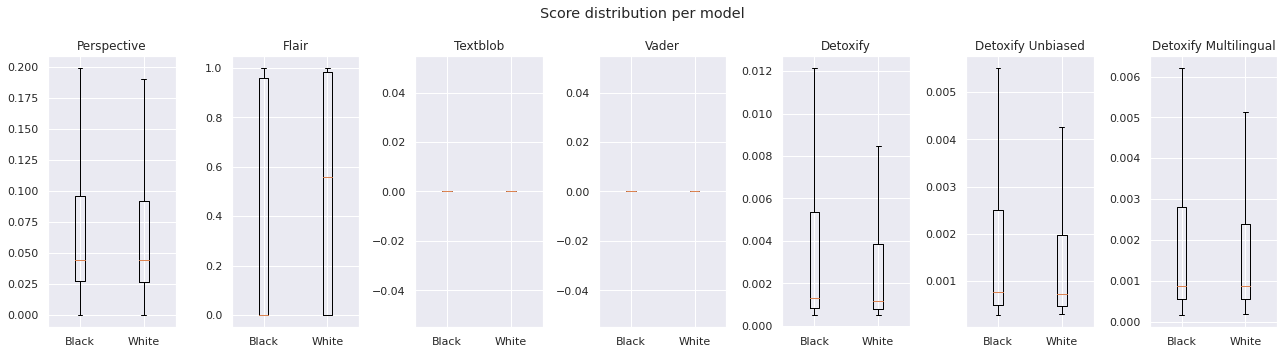

In [6]:
_, axs = plt.subplots(1, 7, figsize=(18,5))

for i, (col, model_name) in enumerate(models.items()):
    axs[i].boxplot(
        [
            df.loc[df.race == "Black", col].dropna(),
            df.loc[df.race == "White", col].dropna()
        ],
        showfliers=False,
        labels=["Black", "White"]
    )
    axs[i].set_title(f"{model_name}")

plt.suptitle("Score distribution per model")
plt.tight_layout()
plt.savefig(os.path.join(img_path, "score_dist.pdf"))

plt.show()